In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Dataset_Final4.csv')

## Data Discretization

In [3]:
bins = [0, 5, 6, 7, 8, 9, 10]
labels = [5, 6, 7, 8, 9, 10]
data['CGPA'] = pd.cut(data['CGPA'], bins=bins, labels=labels)
data['CGPA'] = data['CGPA'].astype(float)


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data


,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
0,YERIMAKU BHAVYATARA,CS21B1026,B.Tech,0,5.0,10.0,21.0,164.0,68.0,25.28,0.0
1,H LAKSHITHA,CS22B1006,B.Tech,0,3.0,6.0,18.0,175.0,76.0,24.82,0.0
2,JANANI K.S,ME22B2041,B.Tech,0,3.0,10.0,20.0,177.0,78.0,24.90,0.0
3,PUNURI ABHISHEK,EC20B1040,B.Tech,3,7.0,6.0,22.0,168.0,70.0,24.80,0.0
4,BASAB GHOSH,CS21B1068,B.Tech,3,5.0,6.0,21.0,179.0,94.0,29.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...
812,PALLE JAIPAUL,CS22B2036,B.Tech,3,3.0,8.0,18.0,174.0,79.0,26.09,0.0
813,P KAARTHICK NATESH,EC22B1004,B.Tech,3,3.0,9.0,20.0,164.0,51.0,18.96,1.0
814,VIKESH KUMAR,EC21B1008,B.Tech,3,5.0,8.0,20.0,172.0,71.0,24.00,1.0
815,KANCHARLA BABA CHARAN,EC21B1200,B.Tech,3,5.0,9.0,21.0,110.0,28.0,23.14,1.0


## Data Cleaning 

In [5]:
print(len(data))
df_no_duplicates = data.dropna()
print(len(df_no_duplicates))
df_no_duplicates = df_no_duplicates.drop_duplicates(subset=['Name','Roll No'])
print(len(df_no_duplicates))


817
807
755


In [6]:
print(df_no_duplicates.describe())

           Gender         Sem        CGPA         Age      Height      Weight  \
count  755.000000  755.000000  755.000000  755.000000  755.000000  755.000000   
mean     2.527152    4.780132    8.013245   20.132450  171.664901   73.719205   
std      1.091438    1.631708    1.445687    1.459786    7.424261   11.624112   
min      0.000000    3.000000    6.000000   18.000000  100.000000   28.000000   
25%      3.000000    3.000000    7.000000   19.000000  168.000000   67.000000   
50%      3.000000    5.000000    8.000000   20.000000  172.000000   72.000000   
75%      3.000000    7.000000    9.000000   21.000000  175.000000   80.000000   
max      3.000000    7.000000   10.000000   26.000000  190.000000  120.000000   

              BMI  Gym/badminton  
count  755.000000     755.000000  
mean    24.888623       0.385430  
std      2.648099       0.487019  
min     15.700000       0.000000  
25%     23.050000       0.000000  
50%     24.810000       0.000000  
75%     26.960000       1

In [7]:
df_no_duplicates['Height'].fillna(round(df_no_duplicates['Height'].mean(),2), inplace=True)
df_no_duplicates['Weight'].fillna(round(df_no_duplicates['Weight'].mean(),2), inplace=True)
df_no_duplicates['CGPA'].fillna(df_no_duplicates['CGPA'].mode(), inplace=True)

C:\Users\kulad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

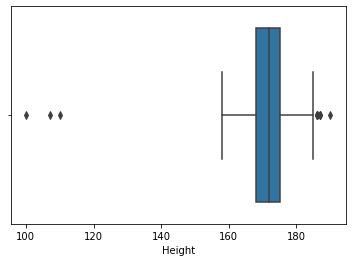

In [8]:
sns.boxplot(df_no_duplicates['Height'])


C:\Users\kulad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

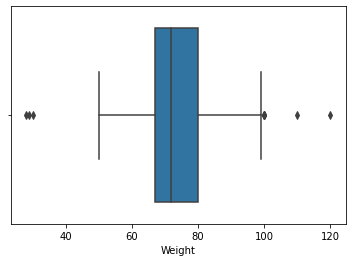

In [9]:
sns.boxplot(df_no_duplicates['Weight'])

C:\Users\kulad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

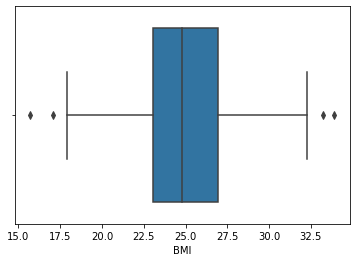

In [10]:
sns.boxplot(df_no_duplicates['BMI'])

In [11]:
df = df_no_duplicates
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(168.0, 175.0)

In [12]:
IQR = Q3 - Q1
IQR

7.0

In [13]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(157.5, 185.5)

In [14]:
height_outliers = df[(df.Height<lower_limit)|(df.Height>upper_limit)]
height_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
22,IYAPPAN MUTHUKUMAR K,ME22B1074,B.Tech,3,3.0,10.0,18.0,186.0,98.0,28.33,0.0
96,PABBINEEDI PAVAN VENKAT,ME21B1012,B.Tech,3,5.0,10.0,19.0,187.0,89.0,25.45,0.0
283,V.S.HARDHIK RAJ,EC22B1048,B.Tech,3,3.0,8.0,18.0,186.0,85.0,24.57,1.0
376,KONDABA DATTATRAY ASOLE,EC22B1036,B.Tech,3,3.0,10.0,18.0,186.0,85.0,24.57,1.0
493,B PRANEETH,ME21B2031,B.Tech,3,5.0,6.0,21.0,187.0,92.0,26.31,0.0
570,VARIKUTI NARENDRA REDDY,ME20B1234,B.Tech,3,7.0,9.0,22.0,107.0,29.0,25.43,1.0
629,GEDUPUDI BHARGHAV RAM,CS21B1090,B.Tech,3,5.0,9.0,20.0,100.0,30.0,30.00,0.0
720,ANDEY AASHISH,ME22B2212,B.Tech,3,3.0,8.0,19.0,190.0,120.0,33.20,1.0
746,BALIREDDY KALYAN SRIDHAR,ME22B1014,B.Tech,3,3.0,9.0,18.0,186.0,84.0,24.28,1.0
809,AZAD KUMAR,EC22B1109,B.Tech,3,3.0,7.0,19.0,187.0,88.0,25.17,1.0


In [15]:
new_df = df[(df.Height>lower_limit)&(df.Height<upper_limit)]

In [16]:
new_df.describe()

,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,2.520161,4.790323,8.004032,20.143817,171.767473,73.696237,24.866210,0.381720
std,1.097959,1.633799,1.446669,1.458078,5.979864,11.128477,2.638776,0.486135
min,0.000000,3.000000,6.000000,18.000000,158.000000,50.000000,15.700000,0.000000
25%,3.000000,3.000000,7.000000,19.000000,168.000000,67.000000,23.050000,0.000000
50%,3.000000,5.000000,8.000000,20.000000,172.000000,72.000000,24.805000,0.000000
75%,3.000000,7.000000,9.000000,21.000000,175.000000,80.000000,26.960000,1.000000
max,3.000000,7.000000,10.000000,26.000000,185.000000,110.000000,33.910000,1.000000


C:\Users\kulad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

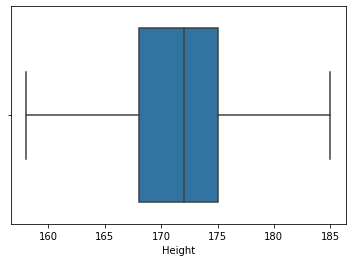

In [17]:
sns.boxplot(new_df['Height'])

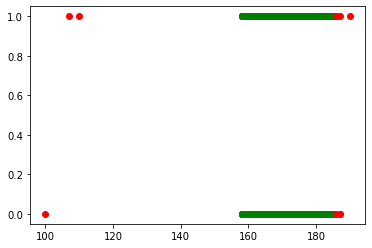

In [18]:
plt.scatter(y=np.array(new_df['Gym/badminton']), x=np.array(new_df['Height']), c='g', marker = 'o')
plt.scatter(y=np.array(height_outliers['Gym/badminton']), x=np.array(height_outliers['Height']), c='r', marker = 'o')
plt.show()

C:\Users\kulad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

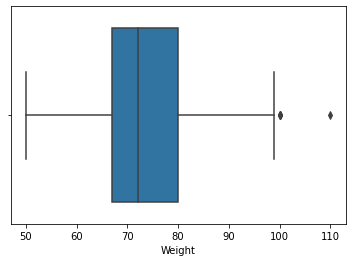

In [19]:
sns.boxplot(new_df['Weight'])

In [20]:
Q1 = new_df.Weight.quantile(0.25)
Q3 = new_df.Weight.quantile(0.75)
Q1, Q3

(67.0, 80.0)

In [21]:
IQR = Q3 - Q1
IQR

13.0

In [22]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(47.5, 99.5)

In [23]:
weight_outliers = new_df[(new_df.Weight<lower_limit)|(new_df.Weight>upper_limit)]
new_df = new_df[(new_df.Weight>lower_limit)&(new_df.Weight<upper_limit)]
weight_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
239,KRISHNA K BHARADWAJ,EC22B1073,B.Tech,3,3.0,6.0,18.0,179.0,100.0,31.21,1.0
277,RUSHABH RAJUKUMAR DARJI,EC21B1088,B.Tech,3,5.0,6.0,20.0,176.0,100.0,32.28,0.0
384,SURAJ KUMAR,ME22B1073,B.Tech,3,3.0,10.0,19.0,179.0,100.0,31.21,1.0
602,PRADEEP YADAV,EC22B1056,B.Tech,3,3.0,10.0,20.0,181.0,100.0,30.52,1.0
743,MYNENI KUSHMA,EC22B1201,B.Tech,0,3.0,9.0,19.0,185.0,110.0,32.16,0.0
769,THUMMA NAGENDRA KUMAR,ME22B2005,B.Tech,3,3.0,8.0,20.0,185.0,100.0,29.22,0.0


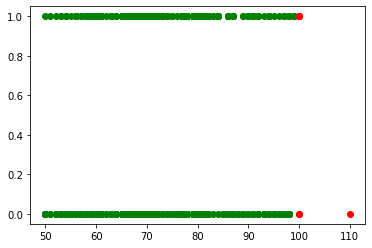

In [24]:
plt.scatter(y=np.array(new_df['Gym/badminton']), x=np.array(new_df['Weight']), c='g', marker = 'o')
plt.scatter(y=np.array(weight_outliers['Gym/badminton']), x=np.array(weight_outliers['Weight']), c='r', marker = 'o')
plt.show()

C:\Users\kulad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

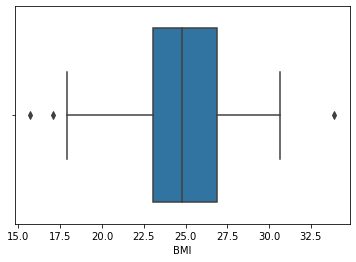

In [25]:
sns.boxplot(new_df['BMI'])

In [26]:
Q1 = new_df.BMI.quantile(0.25)
Q3 = new_df.BMI.quantile(0.75)
Q1, Q3

(23.05, 26.877499999999998)

In [27]:
IQR = Q3 - Q1
IQR

3.827499999999997

In [28]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(17.308750000000003, 32.61874999999999)

In [29]:
bmi_outliers = new_df[(new_df.BMI<lower_limit)|(new_df.BMI>upper_limit)]
new_df = new_df[(new_df.BMI>lower_limit)&(new_df.BMI<upper_limit)]
new_df

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
0,YERIMAKU BHAVYATARA,CS21B1026,B.Tech,0,5.0,10.0,21.0,164.0,68.0,25.28,0.0
1,H LAKSHITHA,CS22B1006,B.Tech,0,3.0,6.0,18.0,175.0,76.0,24.82,0.0
2,JANANI K.S,ME22B2041,B.Tech,0,3.0,10.0,20.0,177.0,78.0,24.90,0.0
3,PUNURI ABHISHEK,EC20B1040,B.Tech,3,7.0,6.0,22.0,168.0,70.0,24.80,0.0
4,BASAB GHOSH,CS21B1068,B.Tech,3,5.0,6.0,21.0,179.0,94.0,29.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...
810,SURYA C S,ME21B1052,B.Tech,3,5.0,10.0,19.0,177.0,89.0,28.41,0.0
811,MANOJI M R,ME21B1027,B.Tech,3,5.0,6.0,19.0,158.0,65.0,26.04,1.0
812,PALLE JAIPAUL,CS22B2036,B.Tech,3,3.0,8.0,18.0,174.0,79.0,26.09,0.0
814,VIKESH KUMAR,EC21B1008,B.Tech,3,5.0,8.0,20.0,172.0,71.0,24.00,1.0


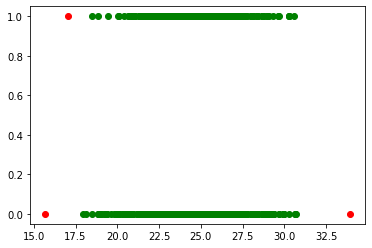

In [30]:
plt.scatter(y=np.array(new_df['Gym/badminton']), x=np.array(new_df['BMI']), c='g', marker = 'o')
plt.scatter(y=np.array(bmi_outliers['Gym/badminton']), x=np.array(bmi_outliers['BMI']), c='r', marker = 'o')
plt.show()

In [41]:
data =df
data['z_score1'] = (data.Height - data.Height.mean())/data.Height.std()
data['z_score2'] = (data.Weight - data.Weight.mean())/data.Weight.std()
weight_outliers = data[(data['z_score2']>3)|(data['z_score2']<-3)]
weight_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton,z_score1,z_score2
570,VARIKUTI NARENDRA REDDY,ME20B1234,B.Tech,3,7.0,9.0,22.0,107.0,29.0,25.43,1.0,-8.709944,-3.847107
629,GEDUPUDI BHARGHAV RAM,CS21B1090,B.Tech,3,5.0,9.0,20.0,100.0,30.0,30.00,0.0,-9.652799,-3.761079
720,ANDEY AASHISH,ME22B2212,B.Tech,3,3.0,8.0,19.0,190.0,120.0,33.20,1.0,2.469619,3.981448
743,MYNENI KUSHMA,EC22B1201,B.Tech,0,3.0,9.0,19.0,185.0,110.0,32.16,0.0,1.796152,3.121167
815,KANCHARLA BABA CHARAN,EC21B1200,B.Tech,3,5.0,9.0,21.0,110.0,28.0,23.14,1.0,-8.305864,-3.933135


In [32]:
height_outliers = data[(data['z_score1']>3)|(data['z_score1']<-3)]
height_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton,z_score1,z_score2
570,VARIKUTI NARENDRA REDDY,ME20B1234,B.Tech,3,7.0,9.0,22.0,107.0,29.0,25.43,1.0,-8.709944,-3.847107
629,GEDUPUDI BHARGHAV RAM,CS21B1090,B.Tech,3,5.0,9.0,20.0,100.0,30.0,30.00,0.0,-9.652799,-3.761079
815,KANCHARLA BABA CHARAN,EC21B1200,B.Tech,3,5.0,9.0,21.0,110.0,28.0,23.14,1.0,-8.305864,-3.933135


In [33]:
new_data = data[(data['z_score1']<3)&(data['z_score1']>-3)&(data['z_score2']<3)&(data['z_score2']>-3)]
new_data

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton,z_score1,z_score2
0,YERIMAKU BHAVYATARA,CS21B1026,B.Tech,0,5.0,10.0,21.0,164.0,68.0,25.28,0.0,-1.032413,-0.492012
1,H LAKSHITHA,CS22B1006,B.Tech,0,3.0,6.0,18.0,175.0,76.0,24.82,0.0,0.449216,0.196212
2,JANANI K.S,ME22B2041,B.Tech,0,3.0,10.0,20.0,177.0,78.0,24.90,0.0,0.718603,0.368269
3,PUNURI ABHISHEK,EC20B1040,B.Tech,3,7.0,6.0,22.0,168.0,70.0,24.80,0.0,-0.493638,-0.319956
4,BASAB GHOSH,CS21B1068,B.Tech,3,5.0,6.0,21.0,179.0,94.0,29.34,0.0,0.987990,1.744718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,SURYA C S,ME21B1052,B.Tech,3,5.0,10.0,19.0,177.0,89.0,28.41,0.0,0.718603,1.314577
811,MANOJI M R,ME21B1027,B.Tech,3,5.0,6.0,19.0,158.0,65.0,26.04,1.0,-1.840574,-0.750096
812,PALLE JAIPAUL,CS22B2036,B.Tech,3,3.0,8.0,18.0,174.0,79.0,26.09,0.0,0.314523,0.454297
814,VIKESH KUMAR,EC21B1008,B.Tech,3,5.0,8.0,20.0,172.0,71.0,24.00,1.0,0.045136,-0.233928


In [34]:
new_df

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
0,YERIMAKU BHAVYATARA,CS21B1026,B.Tech,0,5.0,10.0,21.0,164.0,68.0,25.28,0.0
1,H LAKSHITHA,CS22B1006,B.Tech,0,3.0,6.0,18.0,175.0,76.0,24.82,0.0
2,JANANI K.S,ME22B2041,B.Tech,0,3.0,10.0,20.0,177.0,78.0,24.90,0.0
3,PUNURI ABHISHEK,EC20B1040,B.Tech,3,7.0,6.0,22.0,168.0,70.0,24.80,0.0
4,BASAB GHOSH,CS21B1068,B.Tech,3,5.0,6.0,21.0,179.0,94.0,29.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...
810,SURYA C S,ME21B1052,B.Tech,3,5.0,10.0,19.0,177.0,89.0,28.41,0.0
811,MANOJI M R,ME21B1027,B.Tech,3,5.0,6.0,19.0,158.0,65.0,26.04,1.0
812,PALLE JAIPAUL,CS22B2036,B.Tech,3,3.0,8.0,18.0,174.0,79.0,26.09,0.0
814,VIKESH KUMAR,EC21B1008,B.Tech,3,5.0,8.0,20.0,172.0,71.0,24.00,1.0


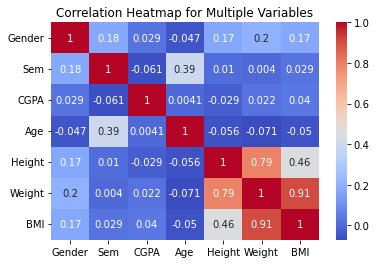

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = new_df.iloc[:, 3:10].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Multiple Variables")
plt.show()

In [36]:

correlation_matrix


,Sem,CGPA,Age,Height,Weight,BMI
Sem,1.000000,-0.061448,0.393863,0.010264,0.003988,0.029492
CGPA,-0.061448,1.000000,0.004061,-0.028544,0.021635,0.040389
Age,0.393863,0.004061,1.000000,-0.056493,-0.070629,-0.049917
Height,0.010264,-0.028544,-0.056493,1.000000,0.788101,0.458960
Weight,0.003988,0.021635,-0.070629,0.788101,1.000000,0.906238
BMI,0.029492,0.040389,-0.049917,0.458960,0.906238,1.000000


In [37]:
eigenvalues = np.linalg.eigvals(correlation_matrix)
eigenvalues


array([2.45839677e+00, 1.39529184e+00, 1.62931964e-03, 5.97629426e-01,
       5.40481640e-01, 1.00657101e+00])

In [38]:
print(sorted(eigenvalues))

[0.0016293196431359765, 0.5404816401409783, 0.5976294264242974, 1.0065710052849923, 1.3952918391847362, 2.4583967693218565]


In [39]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
for i in range(len(eigenvectors)):
    for j in range(len(eigenvalues)):
        print(float(eigenvectors[i][j]))
    print("")

-0.003022218441036204
0.710970311167944
0.015575627861151525
0.6936060241597568
0.11433712757500557
-0.010353123073483125

0.014705518586863213
-0.09954482652121689
-0.0045751244491742254
0.09684354882523988
0.12149978322960026
0.9827068602580936

-0.07109773547176575
0.6939456262960697
0.0011471874156431985
-0.6951574741875843
-0.08644026155782208
0.15055706884543346

0.5231769199163498
0.025396649200877097
-0.3619426813677437
-0.14107231832132314
0.753201761097869
-0.08616335742676777

0.6359780684648998
0.025056796681079185
0.7667968429891822
-0.027111584778861463
-0.07817860543792932
0.008928749975261873

0.5626166837448648
0.04217438849140308
-0.5298634248560568
0.07517751895076084
-0.6255142826872314
0.06331478441724832

